In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 
from utils import *
from anntri import * 
from data_gen import generate_spherical_clusters

# Sample code for the algorithm ANNTri and baselines

## Make some data

Lets begin by making a sample dataset. For this example we will make a clustered data in 2 dimensions.

In [4]:
np.random.seed(42)
num_clusters = 5
num_points_in_each = 5
separation = 2      # clusters are separated by twice their diameter
embedding = generate_spherical_clusters(num_clusters, num_points_in_each, separation_factor=separation)
distance_matrix = compute_true_D(embedding)

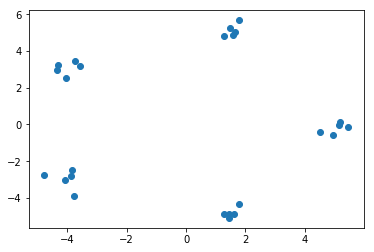

In [3]:
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.show()

## Running each algorithm

Now we will run each algorithm on this embedding. The embedding array is given to the algorithm for the purpose of generating noisy distances, but internal functions for learning nearest neighbors do not make use of this. The ANNTri class has flags for random sampline and ANN (not using the triangle inequality) as well. We begin by setting some parameters common to all algorithms. We will compute the error rate for top-k error, which indicates if the true nearest neighbor is in the closest k empirical means. For k=1, this checks if an algorithm has found the exact nearest neighbor

### Problem parameters

In [5]:
dist_func = d_oracle     # distance function we will use. Defined in utils.
epsilon, delta = 0.7, 0.1  # parameters for law of iterated logarithm confidence bounds
sigma = 0.1              # noise level
Ks = [1, 3, 5, 10]       # top k errors
maxPulls = 10**5         # Stop sampling for efficiency

### Random sampling

We begin with random sampling. Random forms confidence bounds to know when to stop for the sake of time, but these bounds do not inform the sampling procedure. 

In [6]:
triangle = False   # form triangle inequality bounds
rand_instance = ANNTri(dist_func, distance_matrix, epsilon, sigma, delta, triangle, 
                                                                            Ks, 
                                                                            maxPulls=10**5,
                                                                            random_sample=True)
rand_instance.run()

Random: Found nn for arm 1, in 63654 pulls
Random: Found nn for arm 2, in 1358 pulls
Random: Found nn for arm 3, in 1046 pulls
Random: Found nn for arm 4, in 880 pulls
Random: Found nn for arm 5, in 6104 pulls
Random: Found nn for arm 6, in 3546 pulls
Random: Found nn for arm 7, in 2843 pulls
Random: Found nn for arm 8, in 3506 pulls
Random: Found nn for arm 9, in 3416 pulls
Random: Found nn for arm 10, in 1528 pulls
Random: Found nn for arm 11, in 809 pulls
Random: Found nn for arm 12, in 439 pulls
Random: Found nn for arm 13, in 1959 pulls
Random: Found nn for arm 14, in 470 pulls
Random: Found nn for arm 15, in 67 pulls
Random: Found nn for arm 16, in 1109 pulls
Random: Found nn for arm 17, in 587 pulls
Random: Found nn for arm 18, in 2647 pulls
Random: Found nn for arm 19, in 10758 pulls
Random: Found nn for arm 20, in 2303 pulls
Random: Found nn for arm 21, in 47305 pulls
Random: Found nn for arm 22, in 2389 pulls
Random: Found nn for arm 23, in 100000 pulls
Random: Found nn for a

### ANN - not using the triangle inequality.

Next we run ANN, which is equivalent to ANNTri except that it ignores triangle inequality based bounds and instead performs rounds of successive elimination and reuses samples between rounds.

In [7]:
triangle = False   # form triangle inequality bounds
ann_instance = ANNTri(dist_func, distance_matrix, epsilon, sigma, delta, triangle, 
                                                                            Ks, 
                                                                            maxPulls=10**5,
                                                                            random_sample=False)
ann_instance.run()

ANN: Found nn for arm 1 in 4369 pulls
ANN: Found nn for arm 2 in 126 pulls
ANN: Found nn for arm 3 in 45 pulls
ANN: Found nn for arm 4 in 42 pulls
ANN: Found nn for arm 5 in 528 pulls
ANN: Found nn for arm 6 in 449 pulls
ANN: Found nn for arm 7 in 343 pulls
ANN: Found nn for arm 8 in 294 pulls
ANN: Found nn for arm 9 in 369 pulls
ANN: Found nn for arm 10 in 161 pulls
ANN: Found nn for arm 11 in 118 pulls
ANN: Found nn for arm 12 in 55 pulls
ANN: Found nn for arm 13 in 257 pulls
ANN: Found nn for arm 14 in 28 pulls
ANN: Found nn for arm 15 in 11 pulls
ANN: Found nn for arm 16 in 156 pulls
ANN: Found nn for arm 17 in 52 pulls
ANN: Found nn for arm 18 in 262 pulls
ANN: Found nn for arm 19 in 708 pulls
ANN: Found nn for arm 20 in 408 pulls
ANN: Found nn for arm 21 in 5485 pulls
ANN: Found nn for arm 22 in 161 pulls
ANN: Found nn for arm 23 in 11471 pulls
ANN: Found nn for arm 24 in 33 pulls
ANN: Found nn for arm 25 in 2492 pulls


### ANNTri

Finally, we run ANNTri on the same dataset.

In [8]:
triangle = True   # form triangle inequality bounds
anntri_instance = ANNTri(dist_func, distance_matrix, epsilon, sigma, delta, triangle, 
                                                                                Ks, 
                                                                                maxPulls=10**5,
                                                                                random_sample=False)
anntri_instance.run()

ANNTri: Found nn for arm 1 in 5639 pulls
ANNTri: Found nn for arm 2 in 118 pulls
ANNTri: Found nn for arm 3 in 45 pulls
ANNTri: Found nn for arm 4 in 34 pulls
ANNTri: Found nn for arm 5 in 652 pulls
ANNTri: Found nn for arm 6 in 592 pulls
ANNTri: Found nn for arm 7 in 323 pulls
ANNTri: Found nn for arm 8 in 297 pulls
ANNTri: Found nn for arm 9 in 242 pulls
ANNTri: Found nn for arm 10 in 106 pulls
ANNTri: Found nn for arm 11 in 112 pulls
ANNTri: Found nn for arm 12 in 40 pulls
ANNTri: Found nn for arm 13 in 156 pulls
ANNTri: Found nn for arm 14 in 29 pulls
ANNTri: Found nn for arm 15 in 2 pulls
ANNTri: Found nn for arm 16 in 110 pulls
ANNTri: Found nn for arm 17 in 36 pulls
ANNTri: Found nn for arm 18 in 303 pulls
ANNTri: Found nn for arm 19 in 927 pulls
ANNTri: Found nn for arm 20 in 361 pulls
ANNTri: Found nn for arm 21 in 3392 pulls
ANNTri: Found nn for arm 22 in 163 pulls
ANNTri: Found nn for arm 23 in 11654 pulls
ANNTri: Found nn for arm 24 in 32 pulls
ANNTri: Found nn for arm 25 i

## Compare performance of each algorithm

Finally, we compare the performance of each method. We plot the error rate in identifying exact nearest neighbors, and plot this as a function of the number of samples given to each point on a log scale. The curves are noisy since we have not averaged over multiple trials. This is intended to give a quick visual comparison and validation of their performance. To see more in depth results, please refer to our paper.

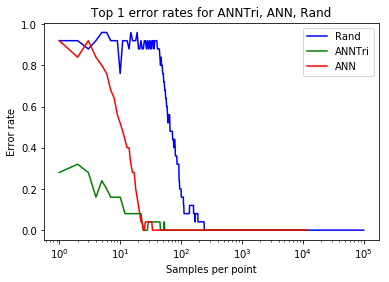

In [9]:
plot_top_k(rand_instance, ann_instance, anntri_instance, Ks, k=1)
